In [50]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import network_module as nm
import argparse

def print_csv(filename, data):
    with open(filename, 'wb') as out:
        for t in data:
            out.write('{}\t{}\n'.format(*t))


# layer_params = sys.argv[1:]

# netname = 'mnist-fc-784-'
# for width in layer_params:
#     netname += '{}-'.format(width)
# netname += '10'
reg = 0
L1 = False
L2 = False
L05 = False
netname = 'conv5-3x3-maxpool-100'
data_source = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

def loadmnist():
    import cPickle, gzip, numpy

    # Load the dataset
    f = gzip.open('./MNIST_data/mnist.pkl.gz', 'rb')
    sets = cPickle.load(f)
    f.close()
    res = []
    for set in sets:
        set[0].shape = (-1, 1, 28, 28)

        label = set[1]
        onehot = np.zeros((label.size, label.max() + 1))
        onehot[np.arange(label.size), label] = 1
        res.append((set[0].reshape(-1, 1, 28, 28), onehot))
    return res


print 'Loading MNIST images...'
train, test, _= loadmnist()


# train = (np.zeros((50, 1, 20, 20)), np.zeros((50 ,1 ,8 , 8)))
# train[0][0,:,5,5] = 0.5
# train[1][0,:,4,4] = 1

def loadnetwork(network_source):
    global nn
    nn = nm.load(network_source)


print 'Constructing network...'
#########################
# NETWORK DEFINITION
nn = nm.network(in_shape=train[0][0].shape, criterion='MSE')
nn.add_shaper(784)
l1 = nn.add_full(50, sharp=True)[-2]
nn.add_activation('tanh')

l2 = nn.add_full(10, sharp=True)[-2]
nn.add_activation('tanh')

l2T = nn.add_full(50, sharp=True)[-2]
nn.add_activation('tanh')

l1T = nn.add_full(784, sharp=True)[-2]
nn.add_activation('tanh')

nn.add_shaper((1,28,28))

l1T.weights = l1.weights.T
l2T.weights = l2.weights.T

#########################
print nn
    
def imshow(im, cmap='Greys', interpol='None'):
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    if len(im.shape) == 3:
        for i, x in enumerate(im, 1):
            plt.subplot(1, len(im), i)
            plt.imshow(x.squeeze(), cmap=cmap, interpolation=interpol)
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
            plt.gca().yaxis.set_major_locator(plt.NullLocator())
    if len(im.shape) == 4:
        for irow, xrow in enumerate(im, 0):
            for icol, x in enumerate(xrow, 1):
                # print '\r  ', len(im), len(xrow), irow * len(xrow) + icol
                plt.subplot(len(im), len(xrow), irow * len(xrow) + icol)
                plt.imshow(x.squeeze(), cmap=cmap, interpolation=interpol)
                plt.gca().xaxis.set_major_locator(plt.NullLocator())
                plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.show()
    return im.shape


def visualise_layer(layer_ind=4, top=9, epoch=10, activation_set=train[0], biased=False, rate=0.05):
    test = nn.grad_ascent(
        layer_ind=layer_ind, 
        activation_set=activation_set, 
        top=top, 
        epoch=epoch, 
        biased=biased)
    test = test.reshape((top,) + nn[layer_ind].shape + (28, 28))
    test = np.concatenate((test, test.mean(axis=0)[np.newaxis, :]), axis=0)
    return test

def max_act(lay_ind, top=9):
    return test[0][nn.max_act(lay_ind, test[0], top)].squeeze()



Loading MNIST images...
Constructing network...
Network ID: 140526948750928
Network layout:
------------------------------
	INPUT  (1, 28, 28)
	   |
	   |
	  |1|
  shaper  (784,)
	   |
	   |
	  |2|
  fully connected  (50,)   ->   weights + bias: (50, 784) + (50,)
	   |
	   |
	  |3|
  activation (50,)   ->   type: tanh
	   |
	   |
	  |4|
  fully connected  (10,)   ->   weights + bias: (10, 50) + (10,)
	   |
	   |
	  |5|
  activation (10,)   ->   type: tanh
	   |
	   |
	  |6|
  fully connected  (50,)   ->   weights + bias: (50, 10) + (50,)
	   |
	   |
	  |7|
  activation (50,)   ->   type: tanh
	   |
	   |
	  |8|
  fully connected  (784,)   ->   weights + bias: (784, 50) + (784,)
	   |
	   |
	  |9|
  activation (784,)   ->   type: tanh
	   |
	   |
	  |10|
  shaper  (1, 28, 28)
	   |
	   |
	  |11|
  	OUTPUT  (1, 28, 28)   ->   CRITERION  (MSE)
------------------------------


In [51]:
def print_test():
    print nn.last_epoch
    
    
    
def train_net():
  x = train[0][0:10]
  nn.last_epoch = 0
  nn.SGD(train_policy=nn.fix_epoch,
         training_set=(x, x),
         batch=1, rate=0.01,
         L2 = True, reg = 0.001,
         epoch_call_back=print_test(),
         epoch=10)
    

0
   batch: 10 of 10

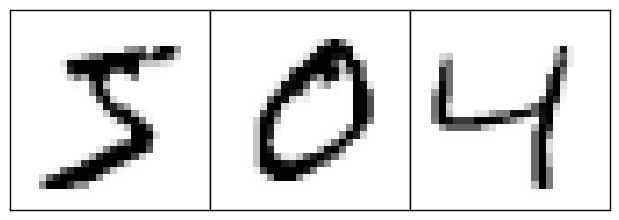

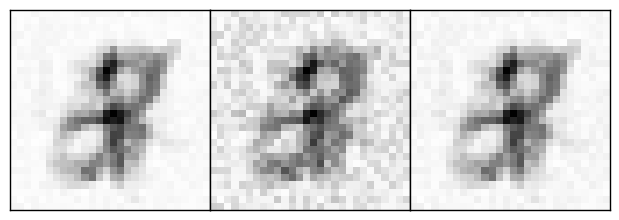

 0
   batch: 10 of 10

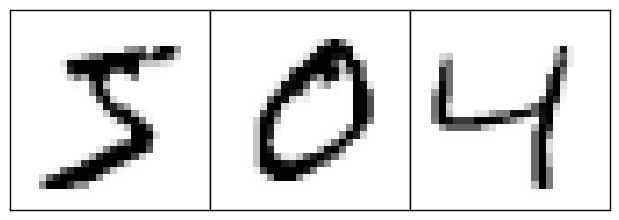

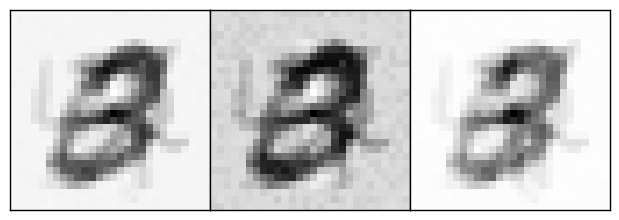

 0
   batch: 10 of 10

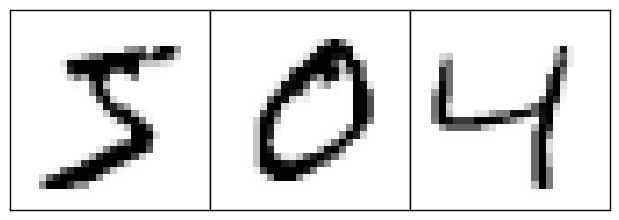

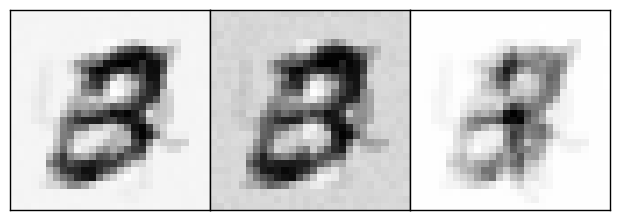

 0
   batch: 10 of 10

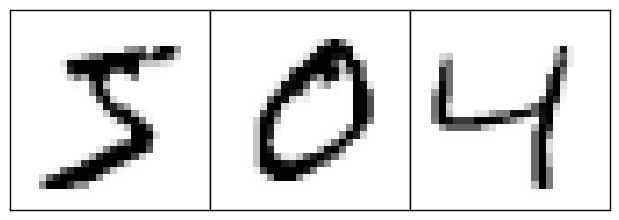

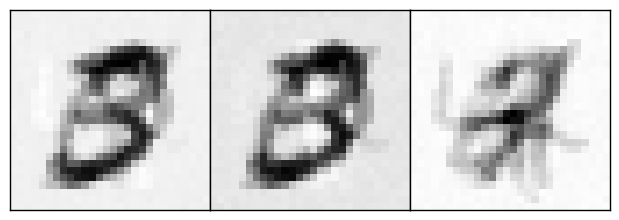

(3, 28, 28)

In [52]:
train_net()
x = train[0][0:10000]
imshow(x[0:3].reshape(3,28,28))
imshow(nn.get_output(x[0:3]).reshape(3,28,28))
train_net()
imshow(x[0:3].reshape(3,28,28))
imshow(nn.get_output(x[0:3]).reshape(3,28,28))
train_net()
imshow(x[0:3].reshape(3,28,28))
imshow(nn.get_output(x[0:3]).reshape(3,28,28))
train_net()
imshow(x[0:3].reshape(3,28,28))
imshow(nn.get_output(x[0:3]).reshape(3,28,28))


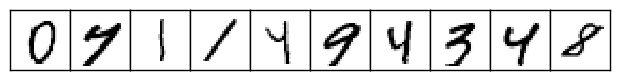

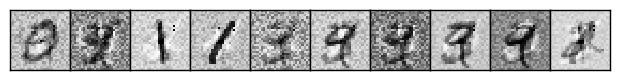

(10, 28, 28)

In [48]:
n=10
imshow(x[1000:1000+n].reshape(n,28,28))
imshow(nn.get_output(x[1000:1000+n]).reshape(n,28,28))

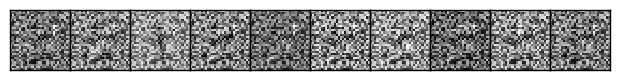

(10, 28, 28)

In [49]:
painter = nm.network(in_shape=10, criterion='MSE')
painter.register_new_layer(nn[6])
painter.register_new_layer(nn[7])
painter.register_new_layer(nn[8])
painter.register_new_layer(nn[9])
painter.register_new_layer(nn[10])
imshow(painter.get_output(np.eye(10)).reshape(10, 28, 28))


18006.5808399
   batch: 1 of 1 asd
[[[[ 1.06  1.04  1.52]
   [ 0.83  1.68  0.92]
   [ 1.3   1.55  1.59]]]]


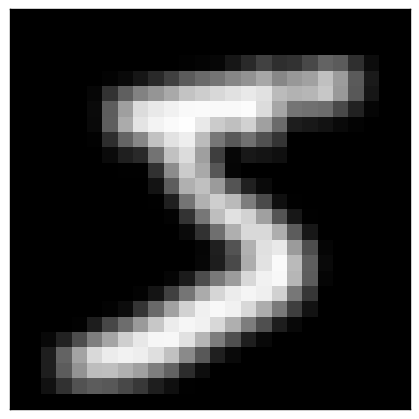

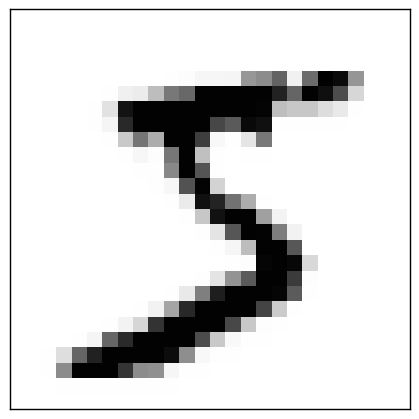

(1, 26, 26)

In [8]:
train_net()
nn.last_epoch = 0
print 'asd'

print nn[1].kernels
imshow(nn[1].output)
imshow(y[None])